In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:

from src.data_preprocessing import load_data, clean_data
# Load dataset 
df = load_data("../data/raw/Telco-Customer-Churn.csv")

In [4]:
# Clean dataset
df = clean_data(df)

print(f"DataFrame shape: {df.shape[0]} rows and {df.shape[1]} columns - Cleaning completed.")

DataFrame shape: 7043 rows and 21 columns - Cleaning completed.


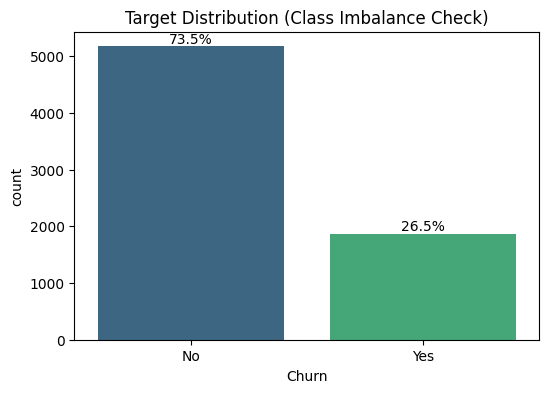

In [5]:
# EDA
FIGURES_DIR = "../reports/figures"

# Check for Class Imbalance
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Churn', data=df, hue='Churn', legend=False, palette='viridis')
plt.title('Target Distribution (Class Imbalance Check)')
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.savefig(f"{FIGURES_DIR}/target_distribution.png")
plt.show()

In [6]:
# Check class imbalance to determine if there is need for class weighting or resampling.
churn_rate = df['Churn'].value_counts(normalize=True)['Yes']
print(f"Global Churn Rate: {churn_rate:.1%}")
if churn_rate < 0.2:
    print("Class Imbalance detected.")

Global Churn Rate: 26.5%


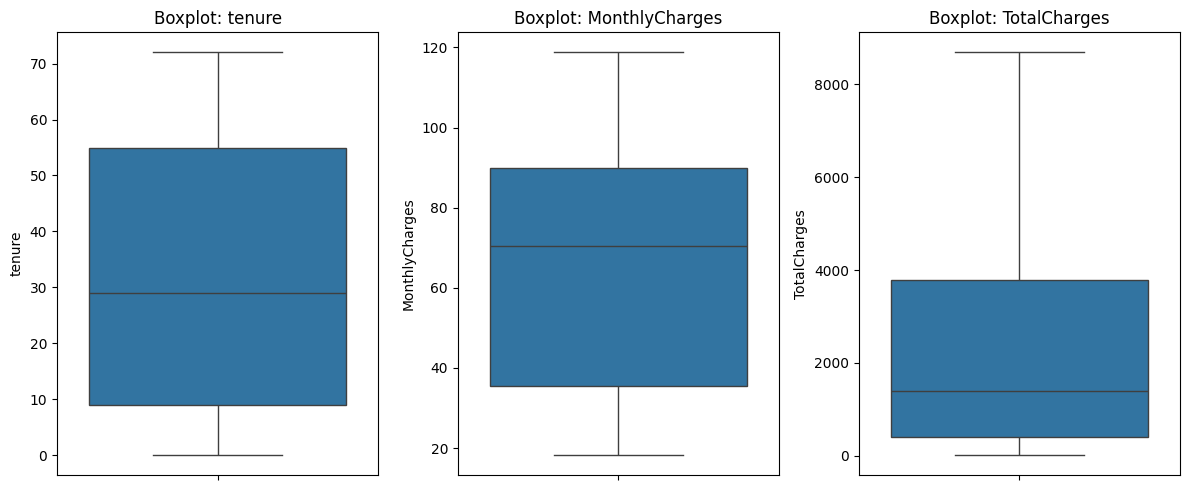

In [7]:
# Check for Outliers in Numerical Features
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(12, 5))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.savefig(f"{FIGURES_DIR}/outliers_boxplot.png")
plt.show()

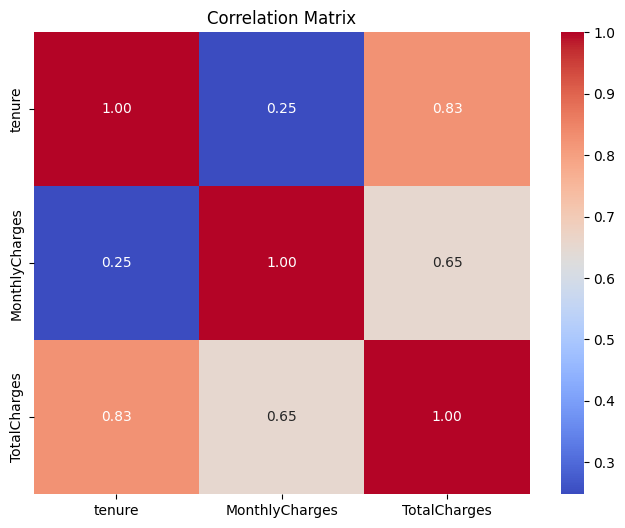

In [8]:
# 3. Correlation Matrix (Numerical)
if 'TotalCharges' in df.columns:
    # Handling NaNs in TotalCharges
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    
    fill_value = df['TotalCharges'].median()
    df['TotalCharges'] = df['TotalCharges'].fillna(fill_value)
    
    
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()